In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())
print(df.describe())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


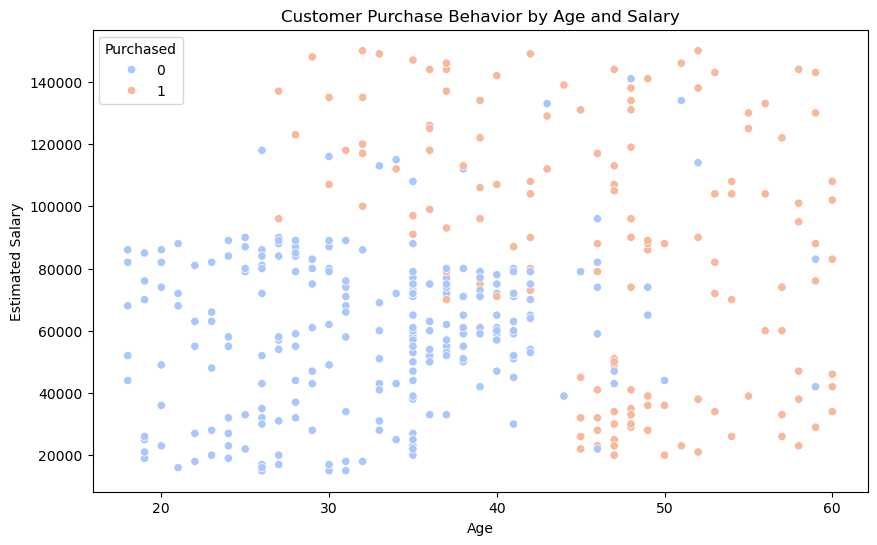

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='coolwarm')
plt.title("Customer Purchase Behavior by Age and Salary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Support Vector Machine": (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]})
}
results = []

In [7]:
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [8]:
results_df = pd.DataFrame(results)
print(results_df)

                    Model                          Best Parameters  Accuracy  \
0     Logistic Regression                                 {'C': 1}      0.89   
1     K-Nearest Neighbors                       {'n_neighbors': 5}      0.93   
2  Support Vector Machine                {'C': 1, 'kernel': 'rbf'}      0.93   
3           Decision Tree                        {'max_depth': 20}      0.90   
4           Random Forest  {'max_depth': None, 'n_estimators': 50}      0.90   

   Precision   Recall  F1 Score  
0   0.888889  0.75000  0.813559  
1   0.878788  0.90625  0.892308  
2   0.878788  0.90625  0.892308  
3   0.823529  0.87500  0.848485  
4   0.823529  0.87500  0.848485  


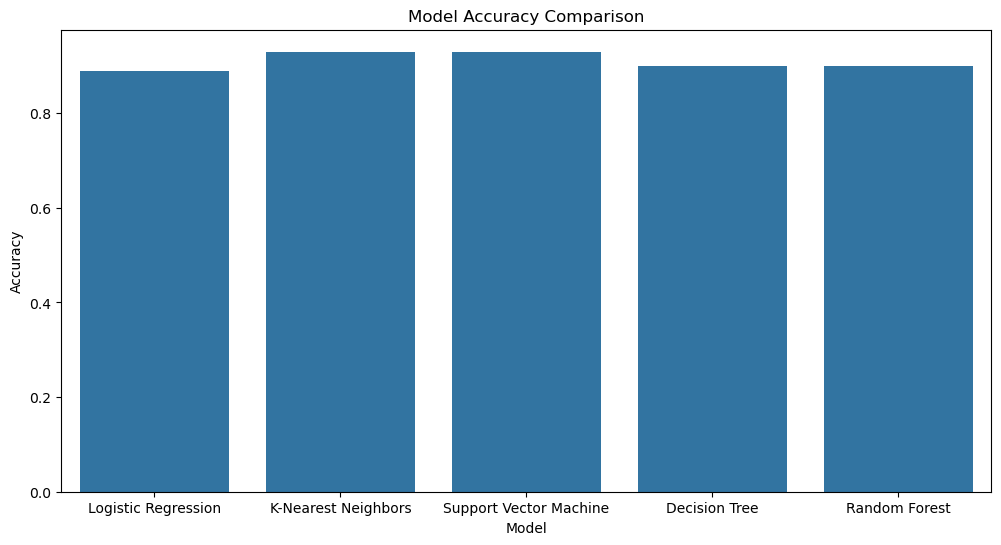

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [10]:
best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"Best Model: {best_model_name}")
print("Classification Report for Best Model:")
best_model = models[best_model_name][0].set_params(**results_df.loc[results_df['Accuracy'].idxmax()]['Best Parameters'])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Model: K-Nearest Neighbors
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [17]:
#Question 1

In [12]:
new_data = pd.DataFrame({
    'Age': [30, 40, 40, 50],
    'EstimatedSalary': [87000, np.nan, 100000, np.nan]
})


In [13]:
median_salary = df['EstimatedSalary'].median()
new_data['EstimatedSalary'].fillna(median_salary, inplace=True)


C:\Users\abhis\AppData\Local\Temp\ipykernel_17068\1382240295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['EstimatedSalary'].fillna(median_salary, inplace=True)


In [14]:
new_data_scaled = scaler.transform(new_data)


In [15]:
best_model = RandomForestClassifier(random_state=0)  
best_model.fit(X_train, y_train) 
predictions = best_model.predict(new_data_scaled)
new_data['Purchased_Prediction'] = predictions
print("Predictions for the new data points:")
print(new_data)

Predictions for the new data points:
   Age  EstimatedSalary  Purchased_Prediction
0   30          87000.0                     0
1   40          70000.0                     1
2   40         100000.0                     1
3   50          70000.0                     0


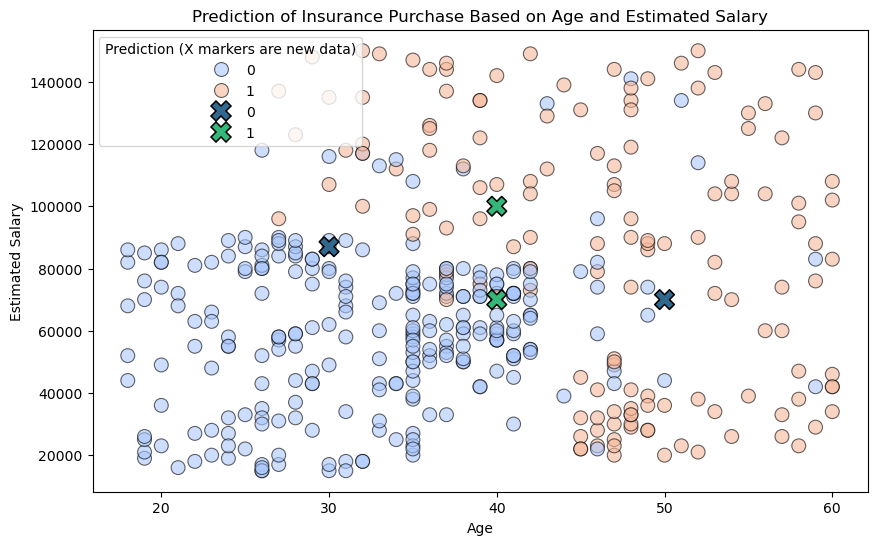

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', s=100, alpha=0.6, edgecolor="k")
sns.scatterplot(data=new_data, x='Age', y='EstimatedSalary', hue='Purchased_Prediction', palette='viridis', marker='X', s=200, edgecolor="k")
plt.title("Prediction of Insurance Purchase Based on Age and Estimated Salary")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(title="Prediction (X markers are new data)")
plt.show()

In [18]:
#Question 2

In [19]:
new_data_extended = pd.DataFrame({
    'Age': [18, 22, 35, 60],
    'EstimatedSalary': [np.nan, 600000, 2500000, 100000000]
})
new_data_extended['EstimatedSalary'].fillna(median_salary, inplace=True)
new_data_extended_scaled = scaler.transform(new_data_extended)

C:\Users\abhis\AppData\Local\Temp\ipykernel_17068\2351566098.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data_extended['EstimatedSalary'].fillna(median_salary, inplace=True)


In [20]:
predictions_extended = best_model.predict(new_data_extended_scaled)
new_data_extended['Purchased_Prediction'] = predictions_extended

In [21]:
print("Predictions for the extended new data points:")
print(new_data_extended)

Predictions for the extended new data points:
   Age  EstimatedSalary  Purchased_Prediction
0   18          70000.0                     0
1   22         600000.0                     0
2   35        2500000.0                     1
3   60      100000000.0                     1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

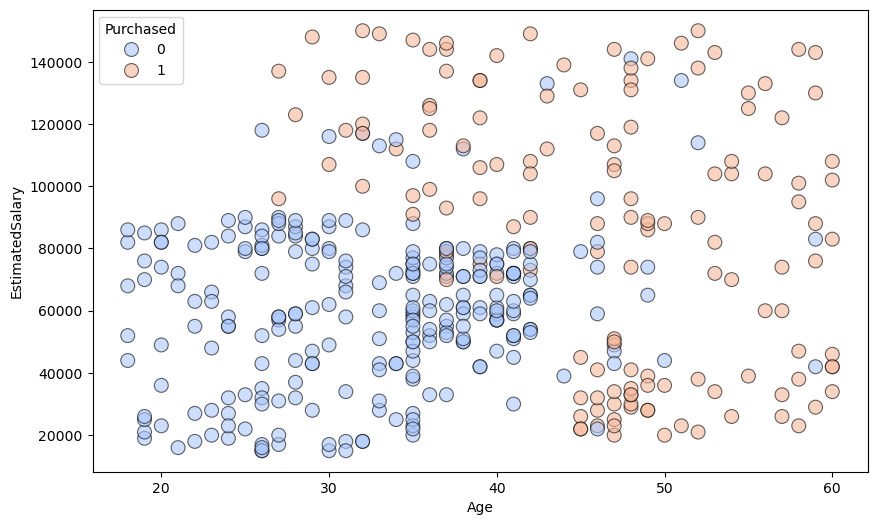

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', s=100, alpha=0.6, edgecolor="k")

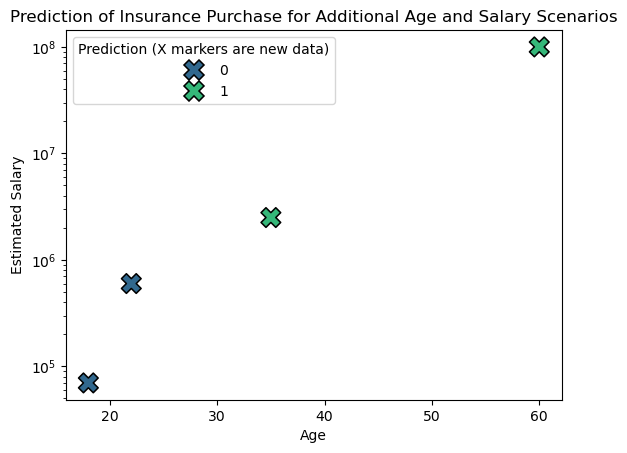

In [23]:
sns.scatterplot(data=new_data_extended, x='Age', y='EstimatedSalary', hue='Purchased_Prediction', palette='viridis', marker='X', s=200, edgecolor="k")
plt.title("Prediction of Insurance Purchase for Additional Age and Salary Scenarios")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(title="Prediction (X markers are new data)")
plt.yscale('log')  
plt.show()

Hypothesis Testing Predictions:
   Age  EstimatedSalary  Purchased_Prediction
0   25            50000                     0
1   45            50000                     1
2   25          1000000                     0
3   60          1000000                     1
4   35           500000                     1
5   50           500000                     1
6   30           200000                     1
7   60           200000                     1
8   22           300000                     0
9   35           300000                     1


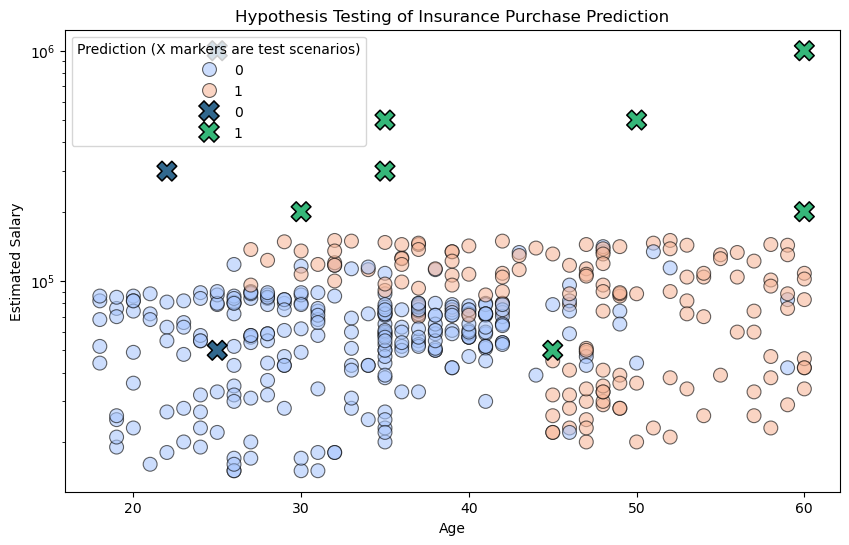

In [24]:
test_scenarios = pd.DataFrame({
    'Age': [25, 45, 25, 60, 35, 50, 30, 60, 22, 35],
    'EstimatedSalary': [50000, 50000, 1000000, 1000000, 500000, 500000, 200000, 200000, 300000, 300000]
})

# Scale the test scenarios using the trained scaler
test_scenarios_scaled = scaler.transform(test_scenarios)

# Predict with the model
test_predictions = best_model.predict(test_scenarios_scaled)
test_scenarios['Purchased_Prediction'] = test_predictions

# Display the predictions for each scenario
print("Hypothesis Testing Predictions:")
print(test_scenarios)

# Visualizing test scenarios predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', s=100, alpha=0.6, edgecolor="k")
sns.scatterplot(data=test_scenarios, x='Age', y='EstimatedSalary', hue='Purchased_Prediction', palette='viridis', marker='X', s=200, edgecolor="k")
plt.title("Hypothesis Testing of Insurance Purchase Prediction")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.yscale('log')
plt.legend(title="Prediction (X markers are test scenarios)")
plt.show()